In [1]:
import torch
import torch.nn as nn
from torch.distributions import normal
from torch.distributions import uniform
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
from pylab import rcParams
rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'gray'

from models import Reservoir
from utils import sinMSE, descend
%load_ext autoreload
%autoreload 2

## Network, optimizer, and SGD definitions

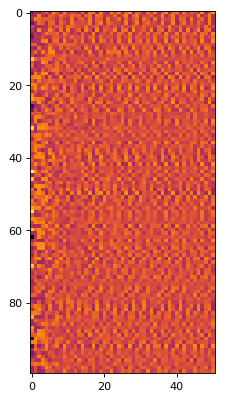

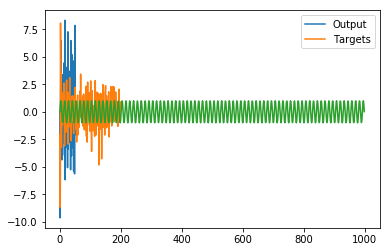

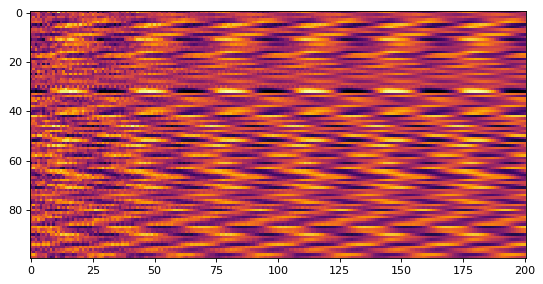

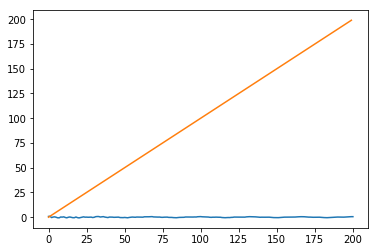

In [26]:
num_neurons = 1000
connectivity = .01
spectral_radius = 1.9


r = Reservoir(num_neurons,connectivity,spectral_radius,init_pattern = 'random',feedback=True,bias=False,fb_scale=0.1)


r.run(steps=50)

ys = []
errs = []
targs = []


dt = .5
steps = 1000

for s in range(steps):
    y = r.forward()
    ys.append(y)

    err, val = sinMSE(y,dt*s)
    errs.append(err)
    targs.append(val)

    err.backward(retain_graph=True)

    readout_grad = r.readout_w.grad

    r.readout_w = descend(r.readout_w,readout_grad,1e-2)
    r.readout_w.grad = None
    
    
plt.plot(ys)
plt.plot(targets)
plt.legend(['Output','Targets'])

plt.show()
r.run()


## Let's train the damned thing

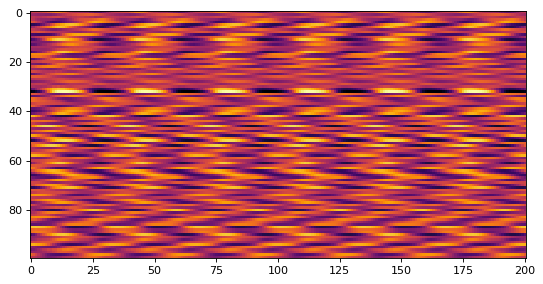

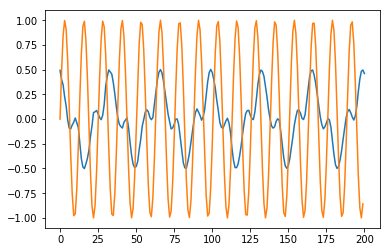

In [27]:
r.run()
plt.plot(targs[:200])

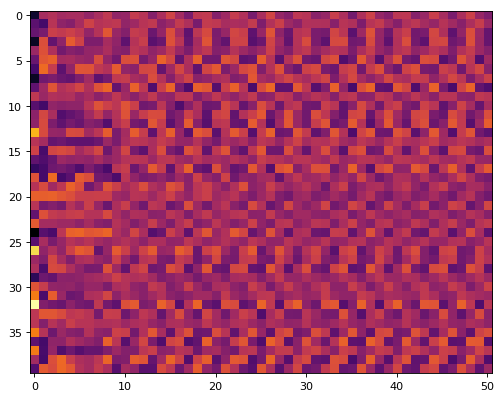

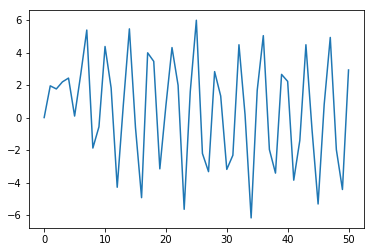

In [31]:
num_neurons = 40
connectivity = .1
spectral_radius = 4


r = Reservoir(num_neurons,connectivity,spectral_radius,init_pattern = 'random',feedback=True,bias=False,fb_scale=0.1)


r.run(steps=50)

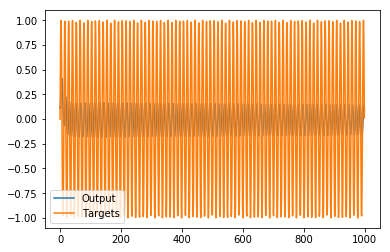

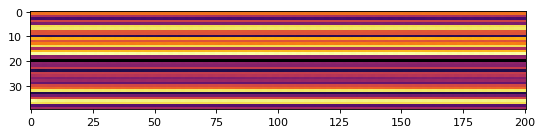

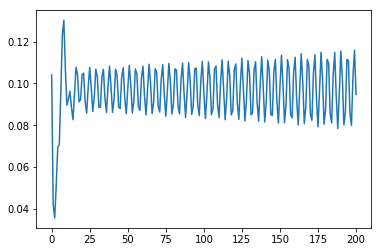

In [33]:
num_neurons = 40
connectivity = .1
spectral_radius = 4


r = Reservoir(num_neurons,connectivity,spectral_radius,init_pattern = 'random',feedback=True,bias=False,fb_scale=0.1)


r.run(steps=50)

ys = []
errs = []
targs = []


dt = .5
steps = 1000

for s in range(steps):
    y = r.forward()
    ys.append(y)

    err, val = sinMSE(y,dt*s)
    errs.append(err)
    targs.append(val)

    err.backward(retain_graph=True)

    readout_grad = r.readout_w.grad

    r.readout_w = descend(r.readout_w,readout_grad,1e-2)
    r.readout_w.grad = None
    
    
plt.plot(ys)
plt.plot(targs)
plt.legend(['Output','Targets'])

plt.show()
r.run()


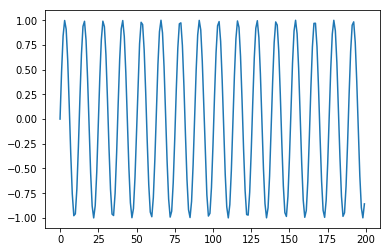

In [34]:
plt.plot(targs[:200])

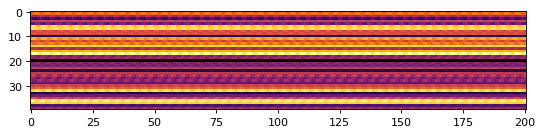

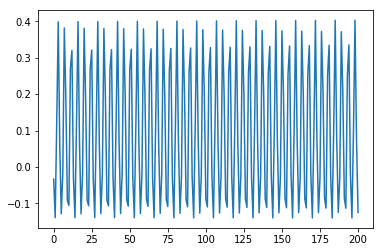

In [53]:
a,b = r.run(steps=200,return_data=True)

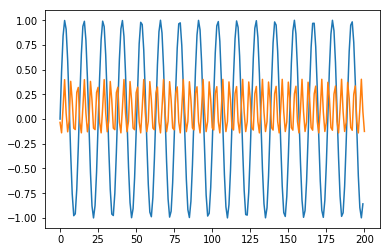

In [54]:

plt.plot(targs[:200])
plt.plot(b)

## BPTT

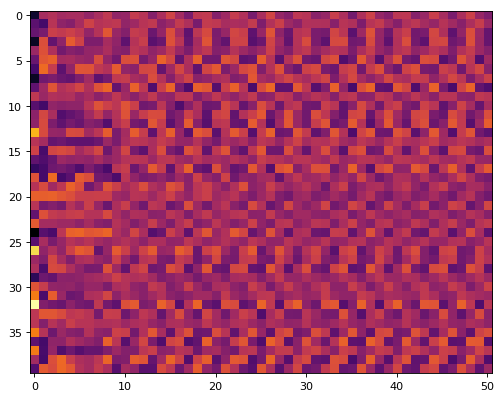

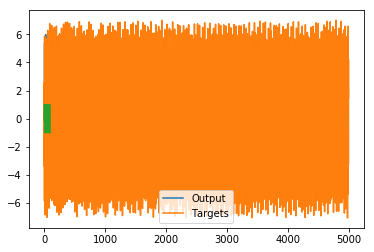

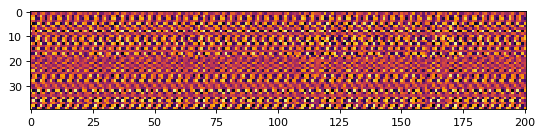

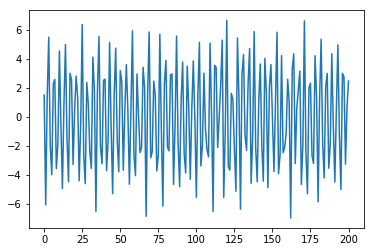

In [63]:
num_neurons = 40
connectivity = .1
spectral_radius = 4


r = Reservoir(num_neurons,connectivity,spectral_radius,init_pattern = 'random',feedback=True,bias=False,fb_scale=0.1)


r.run(steps=50)

ys = []
errs = []
targs = []

trunk=50

dt = .5
steps = 100
t = 0.
for s in range(steps):
    for tr in range(trunk):
        y = r.forward()
        ys.append(y)
        t += dt

    err, val = sinMSE(y,t)
    errs.append(err)
    targs.append(val)
    t += dt

    err.backward(retain_graph=True)

    readout_grad = r.readout_w.grad

    r.readout_w = descend(r.readout_w,readout_grad,1e-5)
    r.readout_w.grad = None
    
    
plt.plot(ys)
plt.plot(targs)
plt.legend(['Output','Targets'])

plt.show()
r.run()


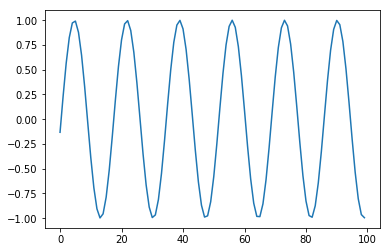

In [62]:
plt.plot(targs[:200])

In [76]:
#bptt test
x = torch.tensor(5.)
w = torch.tensor(20.,requires_grad=True)

def forward():
    y = x*w
    return y

def loss(y):
    diff =y - torch.tensor(16.)
    diff.pow(2)
    return diff.pow(2)
    
for i in range(1):
    y = forward()
    l = loss(y)
    print(y)
    print(l)
    l.backward()
    print(w.grad)
    
    y = forward()
    y = forward()
    l = loss(y)
    l.backward()
    print(w.grad)
    





tensor(100., grad_fn=<MulBackward0>)
tensor(7056., grad_fn=<PowBackward0>)
tensor(840.)
tensor(1680.)
